### Car Price Prediction Analysis

This script performs analysis on a dataset of used car prices, trains linear regression and lasso regression models, and evaluates their performance.

#### Prepared By : Dewansh Vishwakarma

#### Executive Summary:
This study focused on predicting used car prices, achieving a robust R-squared score of 0.88 with the Linear Regression model. Visualizations, such as pair plots and box plots, illuminated feature relationships and categorical impacts. To optimize model accuracy, future efforts will concentrate on hyperparameter tuning, incorporating pertinent features, and expanding the dataset.

####  Importing necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

#### Load the dataset

In [2]:
data = pd.read_csv('car data.csv')

### --- Exploratory Data Analysis (EDA) ---


#### Overview of the Dataset

In [3]:
display(data.head(5))

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


None

In [5]:
# Check for missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
# Summary Statistics
display(data.describe())

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### --- Data Preprocessing ---

#### Handling categorical variables

In [7]:
# Encoding "Fuel_Type," "Selling_Type," and "Transmission" columns
data.replace({'Selling_type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
data.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)
data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

#### Feature Selection

In [8]:
X = data.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = data['Selling_Price']

#### Split Data

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

#### Linear Regression Model:

In [10]:
# Training the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)


LinearRegression()

In [11]:
# Prediction on the training data
training_data_prediction = lin_reg_model.predict(X_train)

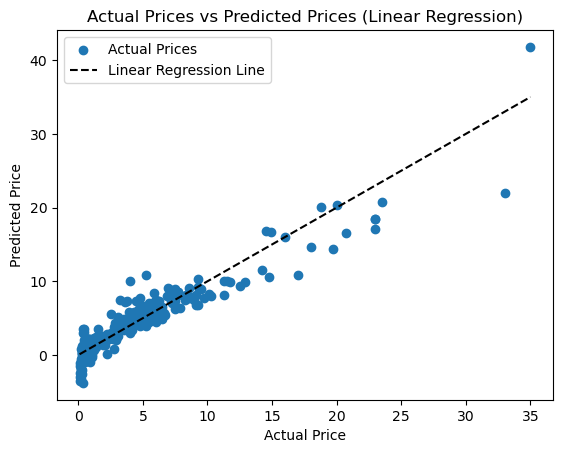

In [12]:
# Visualizing the actual vs. predicted prices for linear regression
plt.scatter(Y_train, training_data_prediction, label='Actual Prices')
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], '--k', label='Linear Regression Line')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (Linear Regression)")
plt.legend()
plt.show()

#### Model Evaluation Metrics:

In [13]:
# Additional metrics for model evaluation
mae = metrics.mean_absolute_error(Y_train, training_data_prediction)
mse = metrics.mean_squared_error(Y_train, training_data_prediction)

In [14]:
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)

Mean Absolute Error:  1.219591095734946
Mean Squared Error:  3.267089578793381


#### Lasso Regression Model:

In [15]:
# Training the lasso regression model
lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train, Y_train)

Lasso()

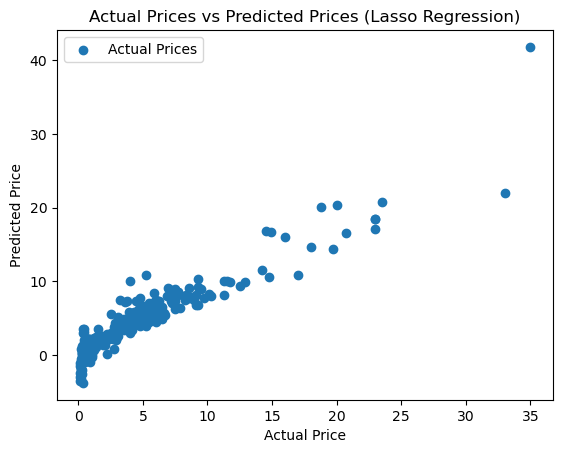

In [16]:
# Visualizing the actual vs. predicted prices for lasso regression
plt.scatter(Y_train, training_data_prediction, label='Actual Prices')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (Lasso Regression)")
plt.legend()
plt.show()


### --- Data Visualization  ---

#### Feature Impact Visualizations:

Visualizing the impact of each feature on selling prices can provide valuable insights.

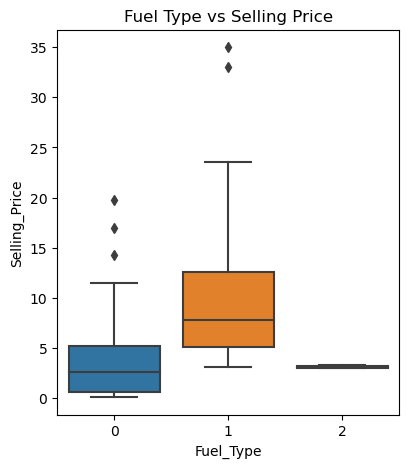

In [17]:
# Box plots for categorical variables
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data)
plt.title("Fuel Type vs Selling Price")

plt.show()


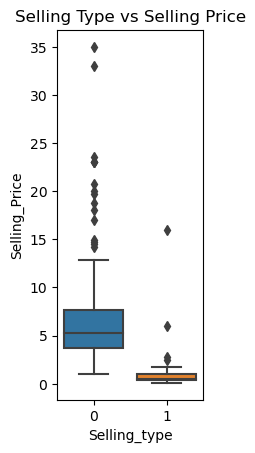

In [18]:
plt.subplot(1, 3, 2)
sns.boxplot(x='Selling_type', y='Selling_Price', data=data)
plt.title("Selling Type vs Selling Price")

plt.show()

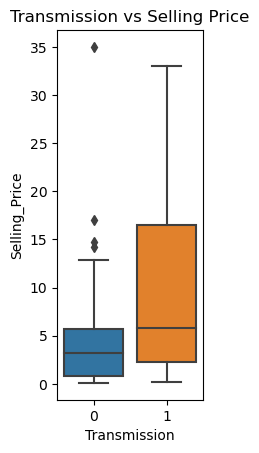

In [19]:
plt.subplot(1, 3, 3)
sns.boxplot(x='Transmission', y='Selling_Price', data=data)
plt.title("Transmission vs Selling Price")
plt.show()

#### Residual Analysis:

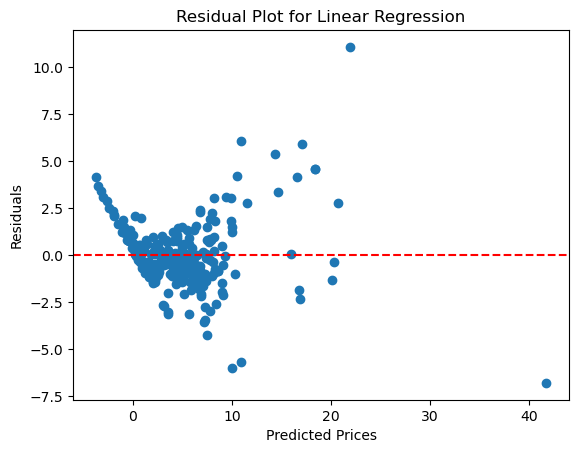

In [20]:
# Residual plot
residuals = Y_train - training_data_prediction
plt.scatter(training_data_prediction, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.show()


#### Actual vs Predicted Prices Comparison :

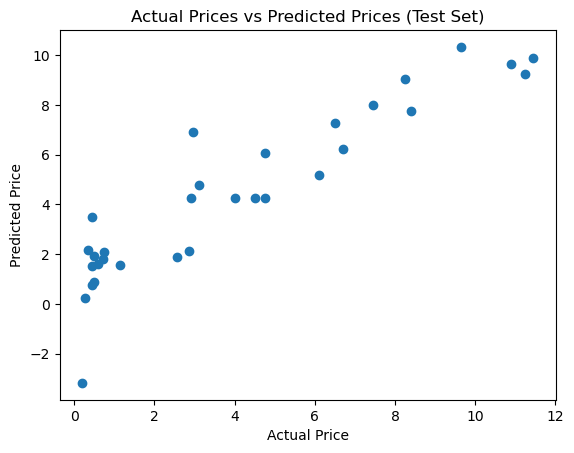

In [21]:
# Prediction on the test data
test_data_prediction = lin_reg_model.predict(X_test)
data.replace({'Selling_type': {'Dealer': 0, 'Individual': 1}}, inplace=True)

# Scatter plot for actual vs predicted prices (test set)
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (Test Set)")
plt.show()


### Conclusion:
The analysis presents a promising foundation for accurate car price predictions. With ongoing refinement, the models hold potential for valuable applications in the used car market, pending further exploration and continuous evaluation for real-world effectiveness.